In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import janitor
import kaggle

In [11]:
dataset_name = 'ramjasmaurya/global-powerplants'
download_path = '../data/raw'

In [12]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_name, path=download_path, unzip=True)

In [33]:
%run pandas-missing-extension.ipynb

In [34]:
dataset_path = '../data/raw/global_power_plants.csv'

In [155]:
df = pd.read_csv(filepath_or_buffer=dataset_path, delimiter=',', header=0)
df[df['country code'] == 'COL']

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
9309,COL,Colombia,Calderas,26.0,7.7918,-74.7732,Hydro,NaN,NaN,NaN,NaN,Isagen S.A.,NaN,CARMA,137.09
9310,COL,Colombia,Cantral La Tasajera,306.0,6.3771,-75.4478,Hydro,NaN,NaN,NaN,NaN,EPM,NaN,CARMA,1135.10
9311,COL,Colombia,Cartagena,188.0,10.3555,-75.5109,Oil,NaN,NaN,NaN,NaN,ENDESA,NaN,GEODB,NaN
9312,COL,Colombia,Central Guadalupe III,270.0,6.8145,-75.2406,Hydro,NaN,NaN,NaN,NaN,EPM,NaN,CARMA,1271.68
9313,COL,Colombia,Central Guatapé,560.0,6.3200,-75.1659,Hydro,NaN,NaN,NaN,NaN,EPM,NaN,WRI,1903.95
9314,COL,Colombia,Chivor,1000.0,4.9008,-73.2969,Hydro,NaN,NaN,NaN,NaN,AES Chivor,NaN,GEODB,3903.61
9315,COL,Colombia,El Paso,86.2,9.6900,-73.7650,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,184.86
9316,COL,Colombia,Gavio,1200.0,4.7247,-73.4831,Hydro,NaN,NaN,NaN,NaN,Emgesa,NaN,WRI,4915.69
9317,COL,Colombia,Gecelca power station,164.0,7.9911,-75.5946,Coal,NaN,NaN,NaN,2016.0,Gecelca SAESP,NaN,GCPT,NaN
9318,COL,Colombia,Jaguas,170.0,6.2944,-75.0259,Hydro,NaN,NaN,NaN,NaN,Isagen S.A.,NaN,CARMA,653.74


### Quick resume of missing values

In [36]:
df.isna().sum()

country code                         0
country_long                         0
name of powerplant                   0
capacity in MW                       0
latitude                             0
longitude                            0
primary_fuel                         0
secondary fuel                   32992
other_fuel2                      34660
other_fuel3                      34844
start date                       17489
owner of plant                   14068
generation_gwh_2021              25277
geolocation_source                 419
estimated_generation_gwh_2021    18816
dtype: int64

In [39]:
print(f'The size of our dataset is {df.size}, number of columns are {df.shape[1]}, and number of rows are {df.shape[0]}')

The size of our dataset is 524040, number of columns are 15, and number of rows are 34936


#### Total complete values

In [40]:
df.missing.number_complete()

345475

In [41]:
df.missing.number_missing()

178565

In [55]:
(
    df
    .isnull()
    .pipe( #you have to create new columns from the original dataset
        lambda null_df : (
            null_df.sum() #a numeric resume of total of missing values per column
            .reset_index()
            .rename(columns={'index':'variable', 0:'n_missing'})
            .assign(
                n_cases = len(null_df), #our dynamic table should be created, null_df works 'cause is a dynamic table
                percent_missing = lambda df_2 : round((df_2.n_missing/df_2.n_cases)*100, 3)
            )
        )
    )
)

,variable,n_missing,n_cases,percent_missing
0,country code,0,34936,0.000
1,country_long,0,34936,0.000
2,name of powerplant,0,34936,0.000
3,capacity in MW,0,34936,0.000
4,latitude,0,34936,0.000
5,longitude,0,34936,0.000
6,primary_fuel,0,34936,0.000
7,secondary fuel,32992,34936,94.436
8,other_fuel2,34660,34936,99.210
9,other_fuel3,34844,34936,99.737


The code block shown above corresponds to `missing.missing_variable_summary()`

In [58]:
df.missing.missing_variable_summary().head(2)

,variable,n_missing,n_cases,pct_missing
0,country code,0,34936,0.0
1,country_long,0,34936,0.0


In [61]:
df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,35.294118
1,1,6,35.294118
2,2,6,35.294118
3,3,6,35.294118
4,4,6,35.294118
...,...,...,...
34931,34931,6,35.294118
34932,34932,6,35.294118
34933,34933,5,29.411765
34934,34934,7,41.176471


In [59]:
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,6,12583,36.017289
1,5,7785,22.283604
2,4,7235,20.709297
3,3,3678,10.527822
4,7,3265,9.345661
5,2,195,0.558163
6,8,104,0.297687
7,1,91,0.260476


In [62]:
df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,7,46.666667
1,419,1,6.666667
2,14068,1,6.666667
3,17489,1,6.666667
4,18816,1,6.666667
5,25277,1,6.666667
6,32992,1,6.666667
7,34660,1,6.666667
8,34844,1,6.666667


In [66]:
df.missing.missing_variable_span(variable='secondary fuel', span_every=200)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,174,26,87.0,13.0
1,1,179,21,89.5,10.5
2,2,200,0,100.0,0.0
3,3,200,0,100.0,0.0
4,4,196,4,98.0,2.0
...,...,...,...,...,...
170,170,161,39,80.5,19.5
171,171,178,22,89.0,11.0
172,172,178,22,89.0,11.0
173,173,200,0,100.0,0.0


In [67]:
df.missing.missing_variable_run(variable='secondary fuel')

,run_length,is_na
0,19,missing
1,1,complete
2,7,missing
3,1,complete
4,6,missing
...,...,...
2942,5,missing
2943,1,complete
2944,5,missing
2945,1,complete


### Visualization of missing values

#### Per variable

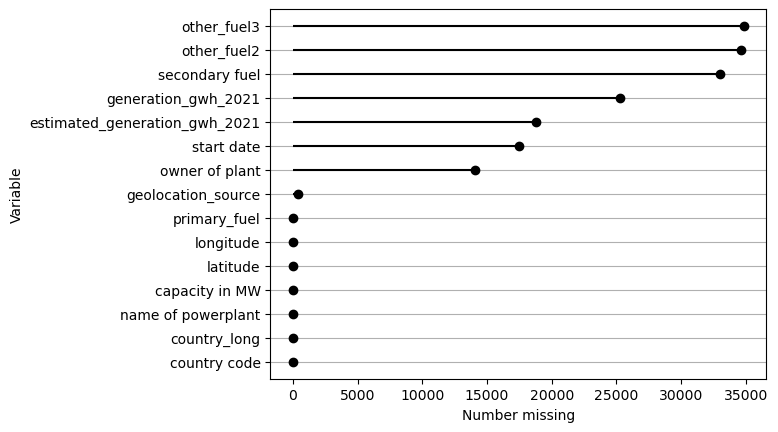

In [68]:
df.missing.missing_variable_plot()

#### Per case/observation/row

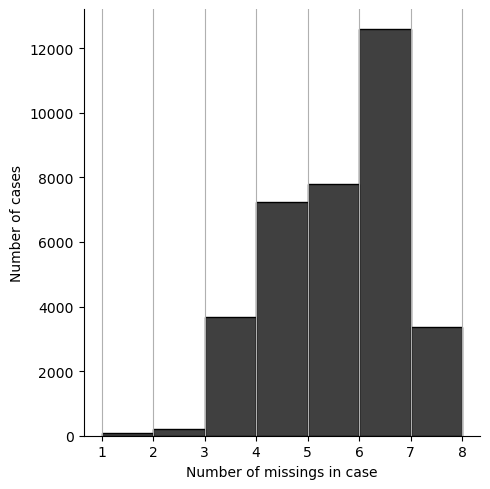

In [69]:
df.missing.missing_case_plot()

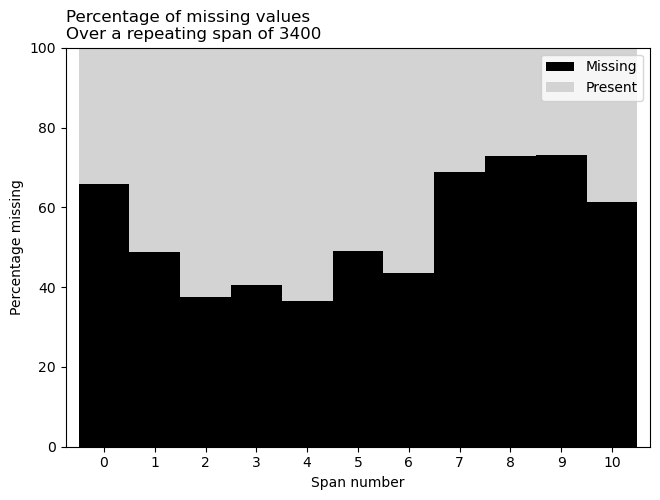

In [77]:
(
    df
    .missing
    .missing_variable_span_plot(
        variable="estimated_generation_gwh_2021",
        span_every=3400,
        rot=0
    )
)

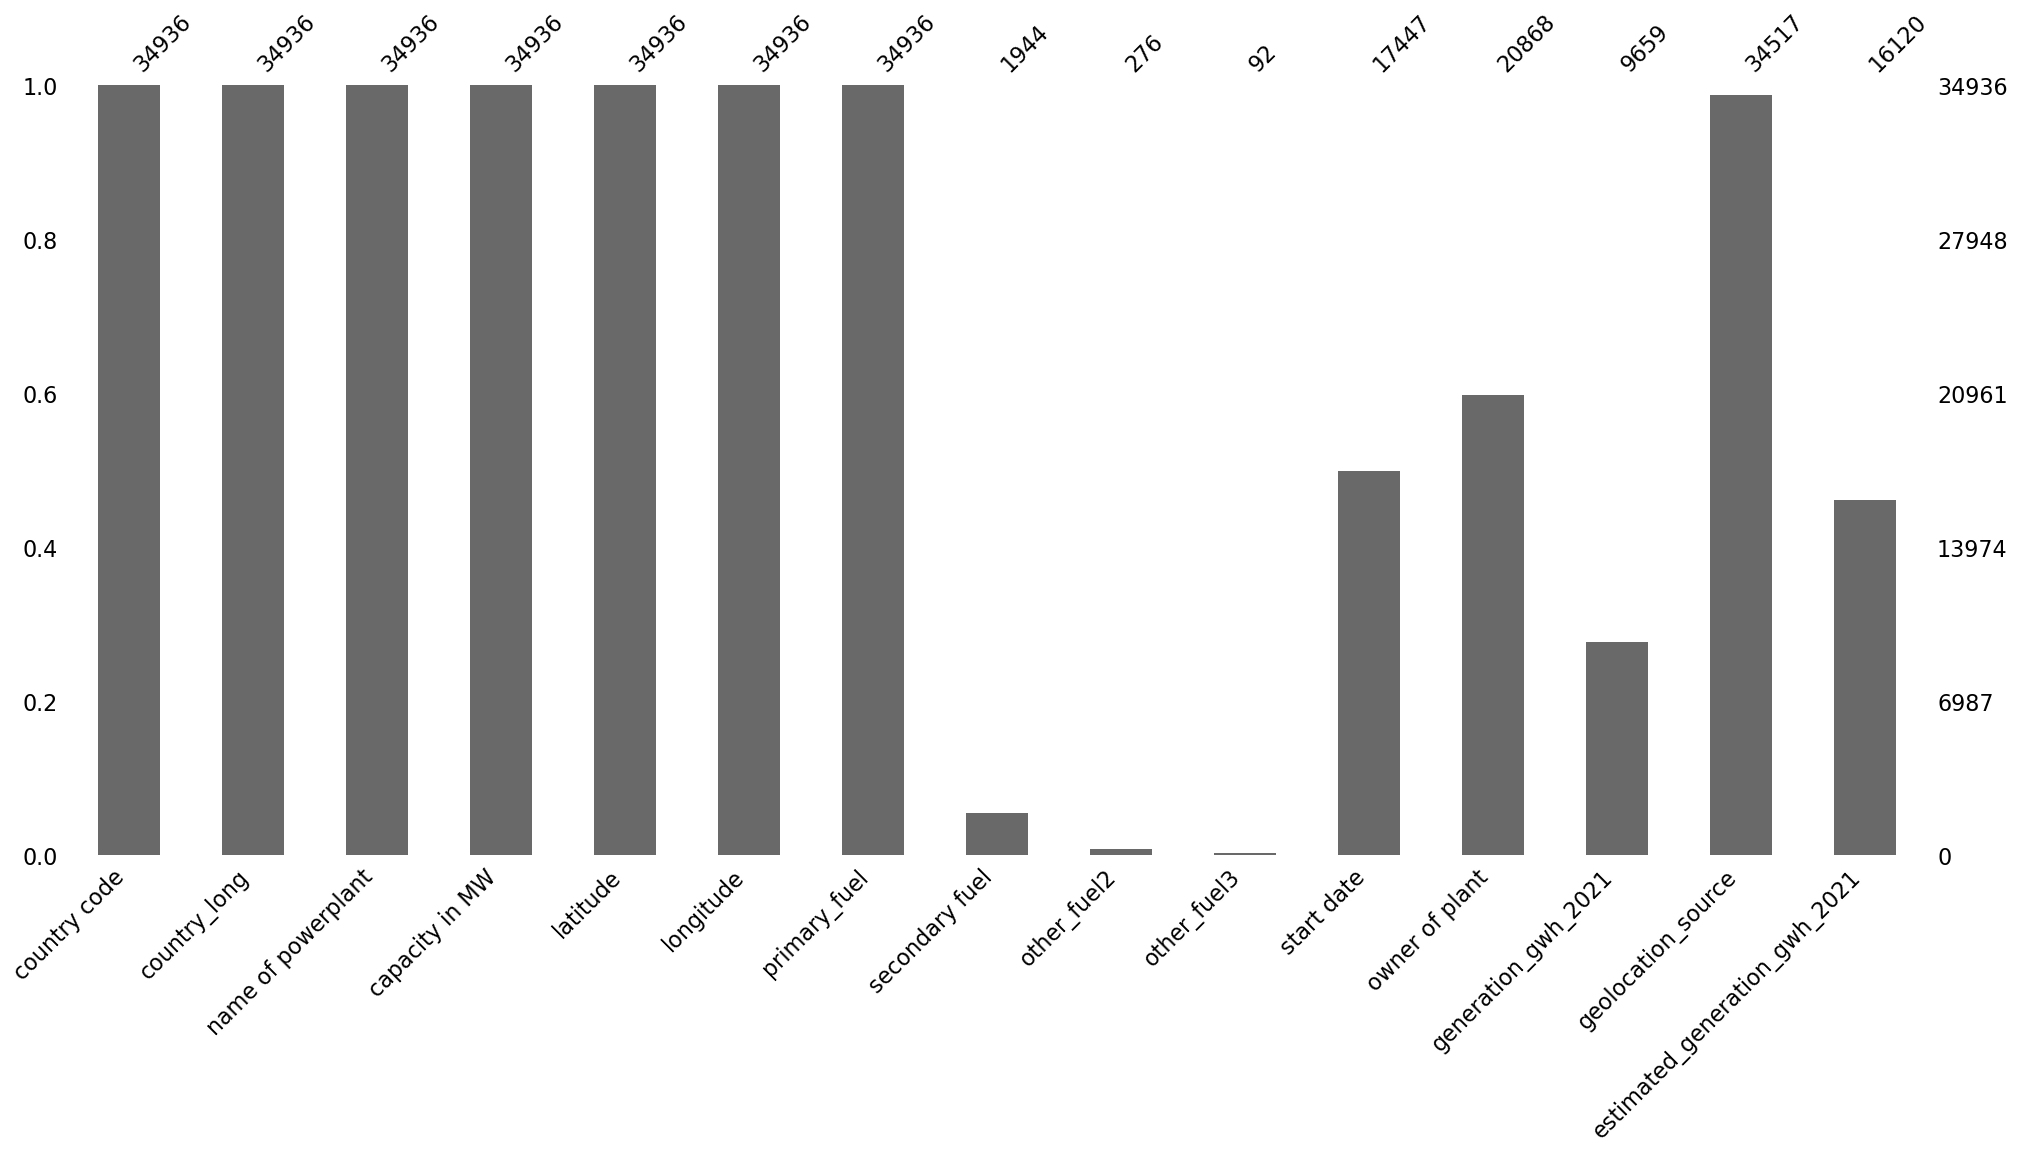

In [75]:
missingno.bar(df=df)
plt.show()

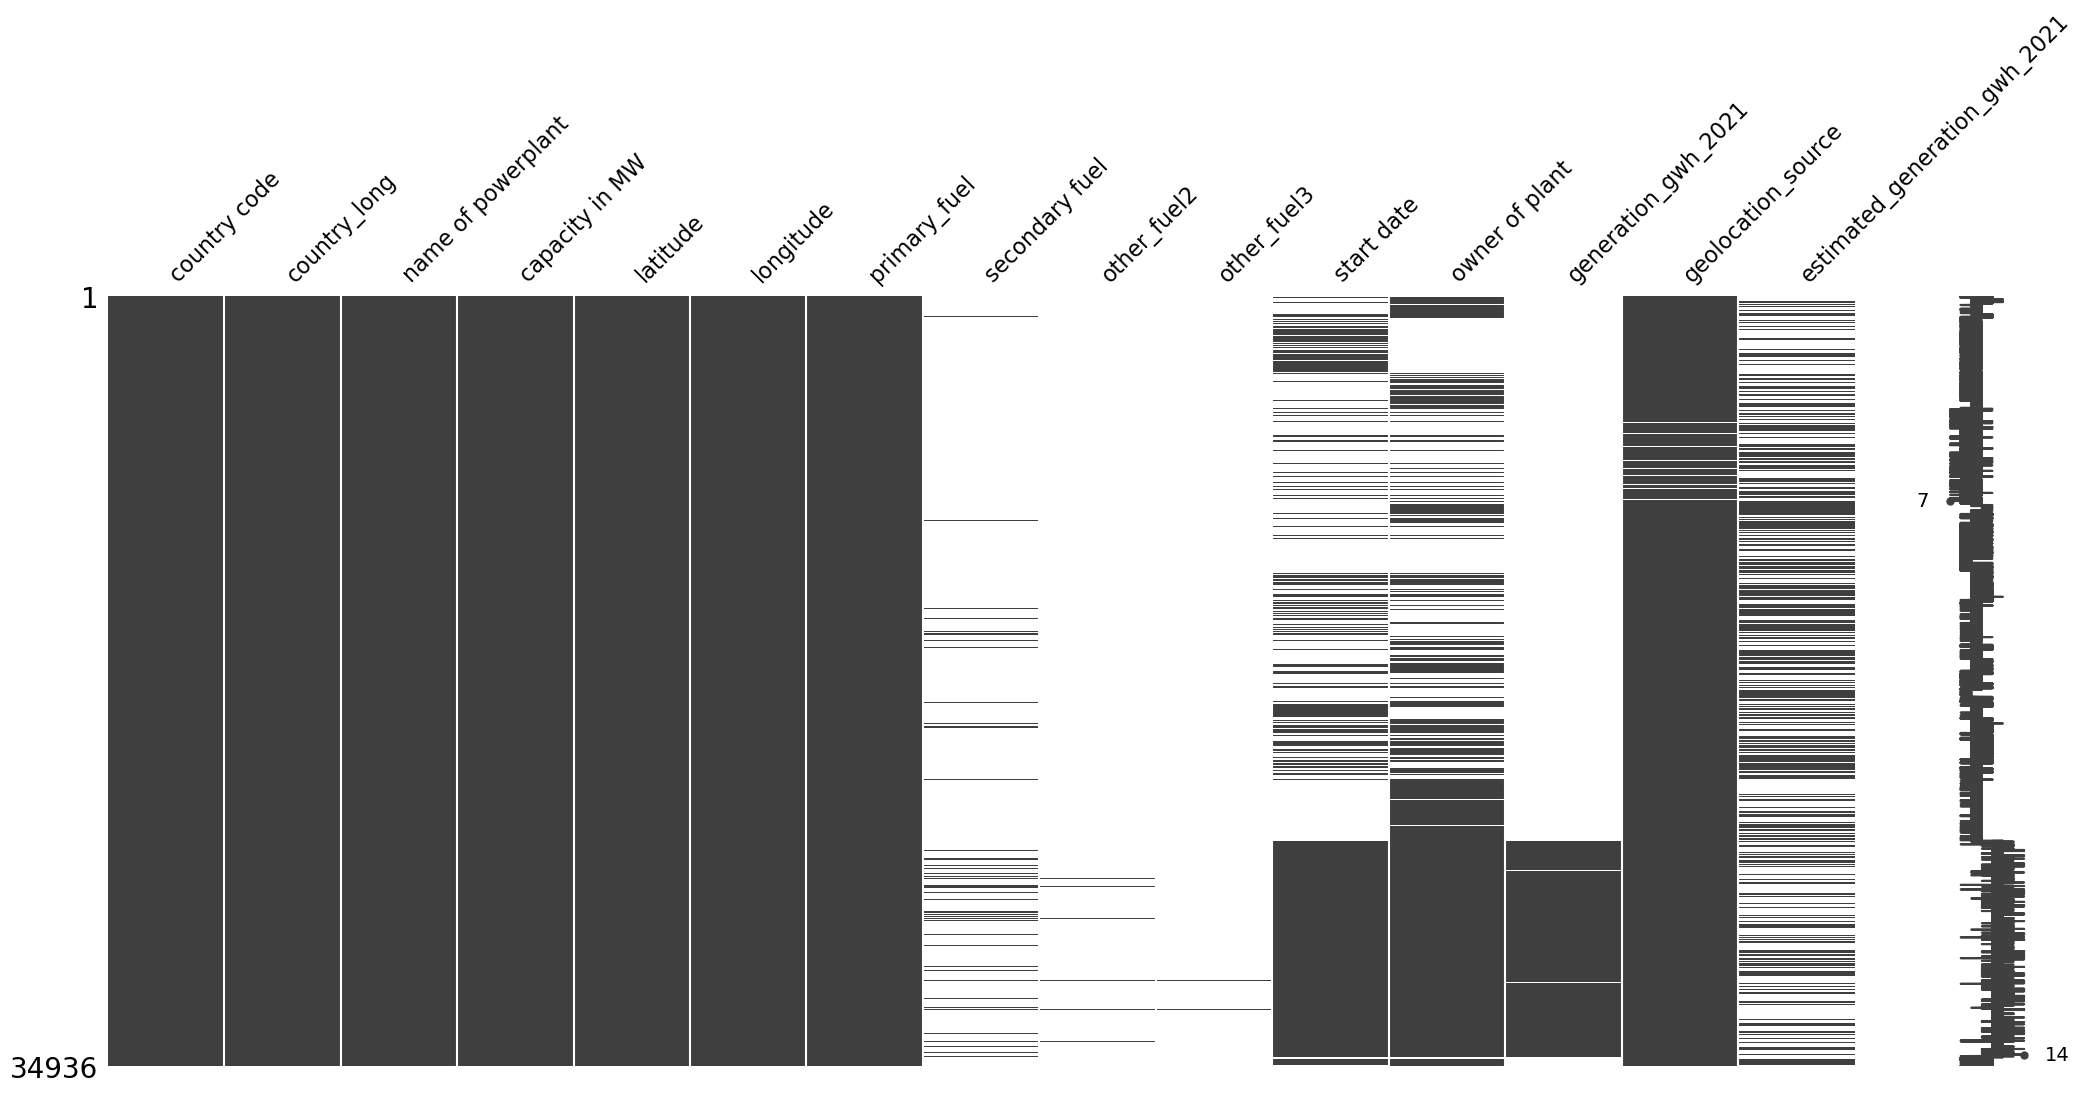

In [76]:
missingno.matrix(df=df)
plt.show()

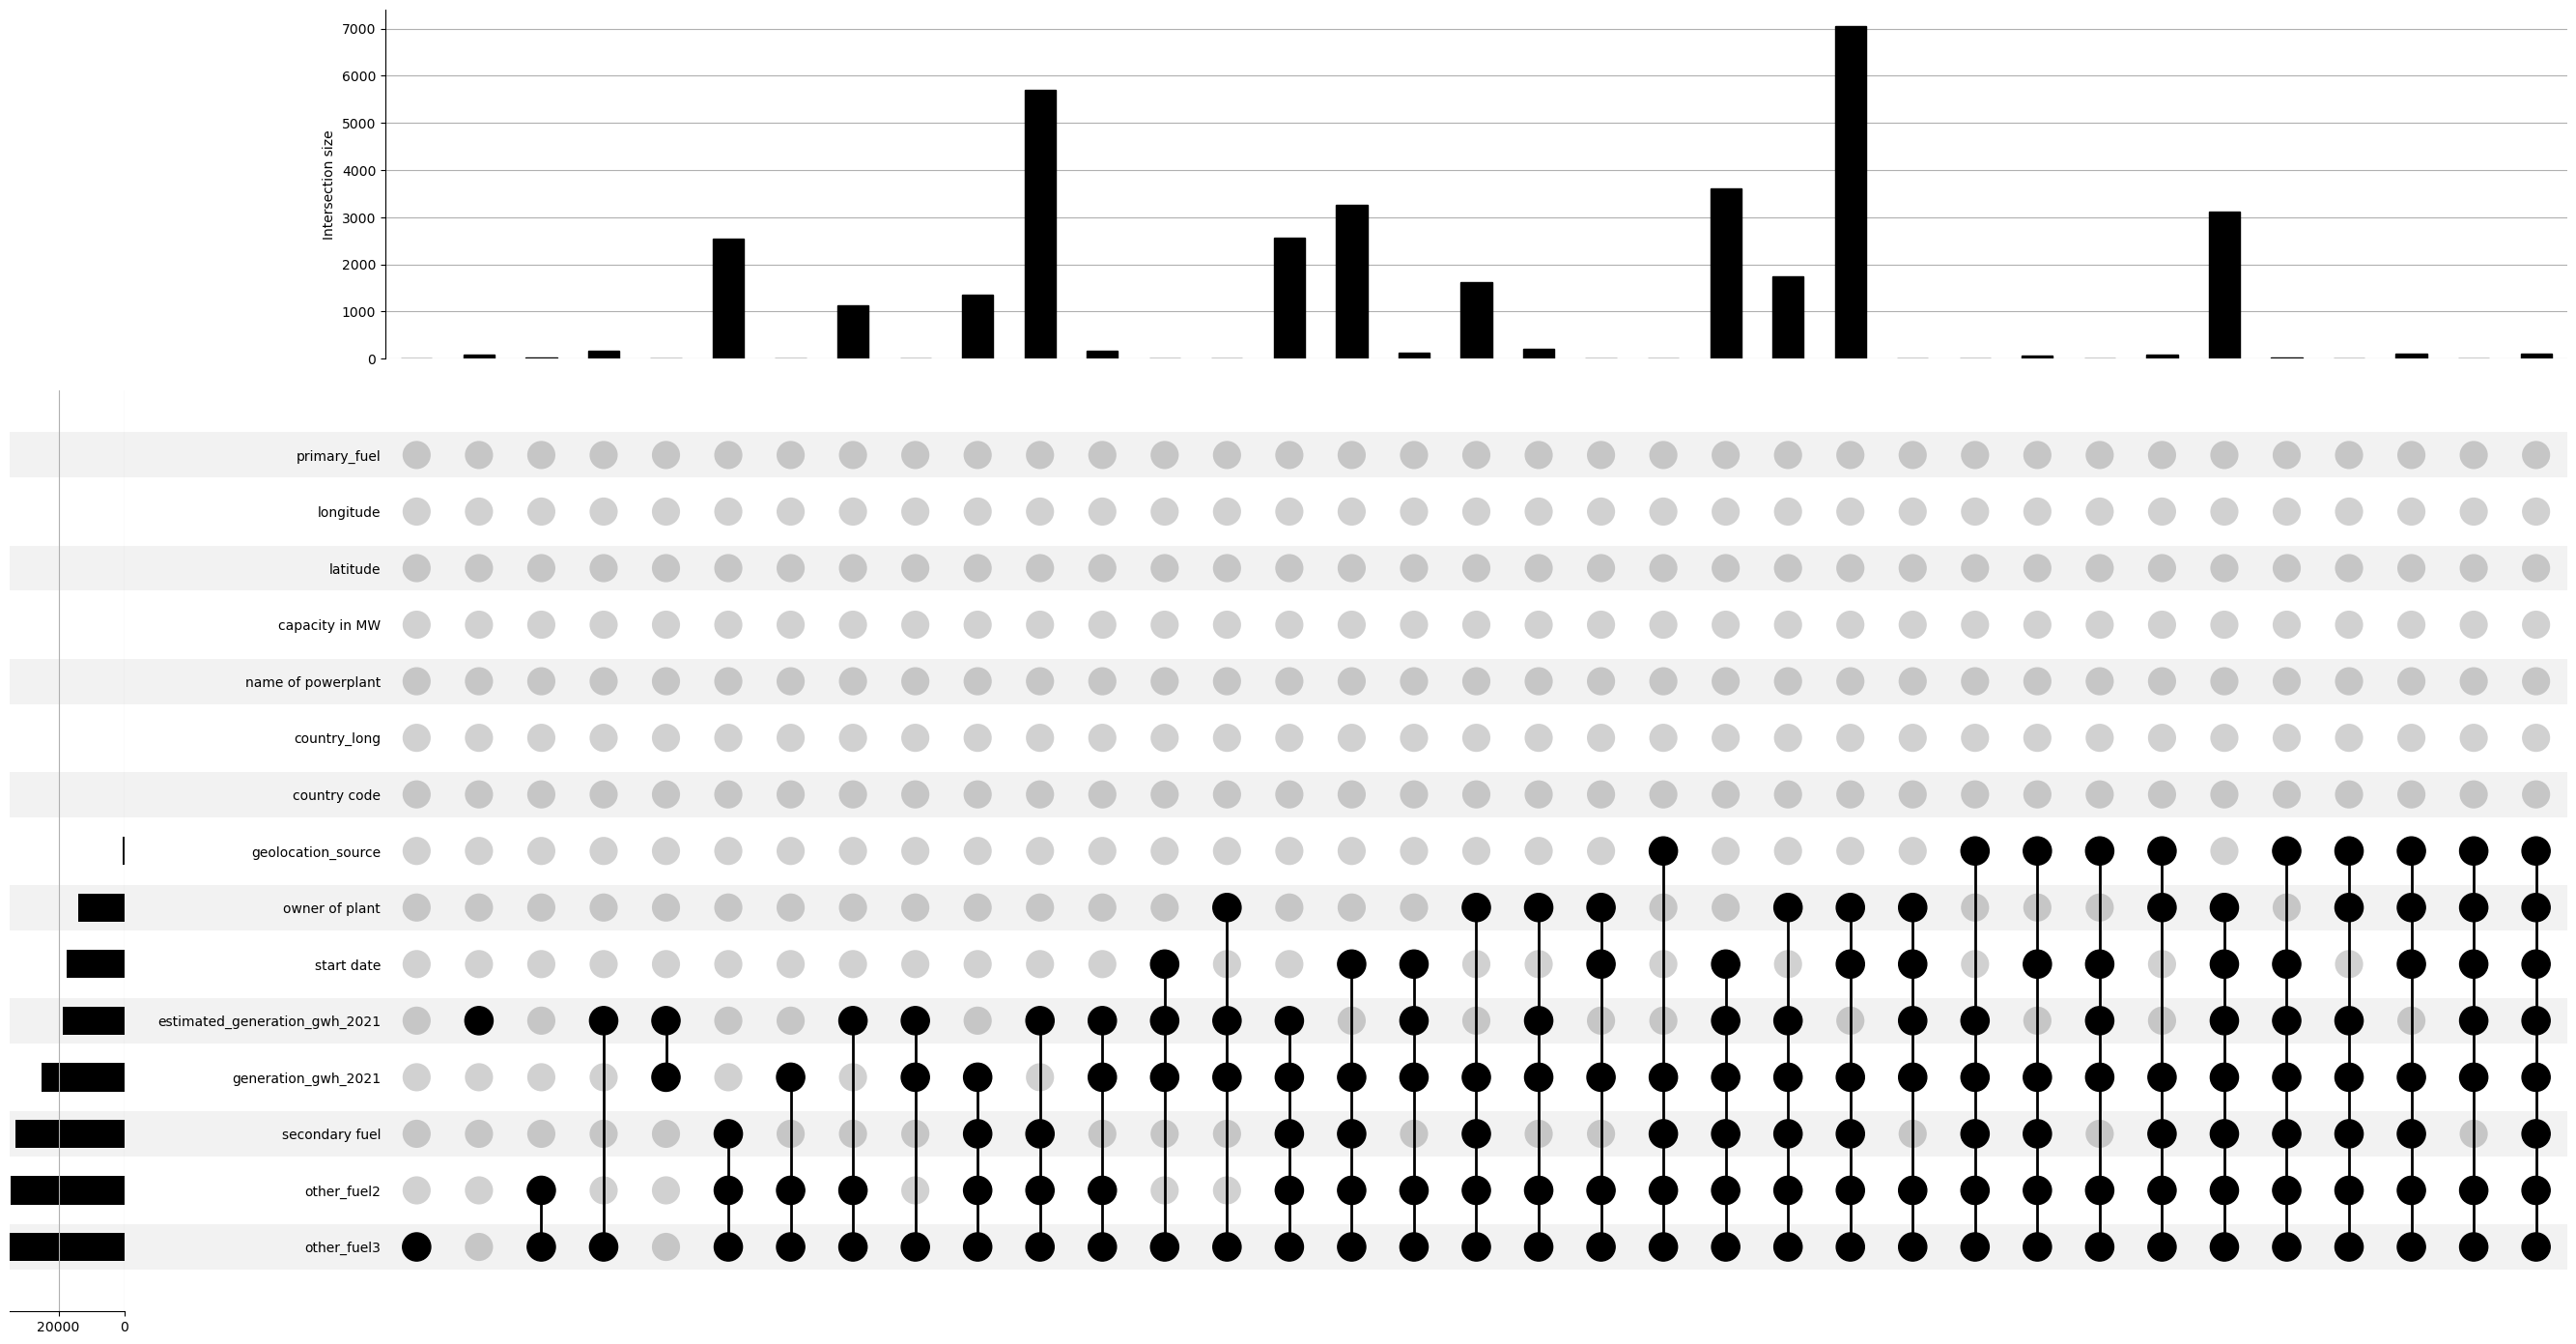

In [80]:
(
    df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size=60
    )
)
plt.show()

#### Check unique values

In [146]:
(
    df
    .pipe(
        lambda null_df : (
            null_df
            .isnull()
            .sum()
            .reset_index()
            .rename(columns={'index':'variable', 0:'missing_values'})
            .assign(
                data_types = df.dtypes.reset_index()[0]
            )
        )
    )
)

,variable,missing_values,data_types
0,country code,0,object
1,country_long,0,object
2,name of powerplant,0,object
3,capacity in MW,0,float64
4,latitude,0,float64
5,longitude,0,float64
6,primary_fuel,0,object
7,secondary fuel,32992,object
8,other_fuel2,34660,object
9,other_fuel3,34844,object


In [156]:
check_unique_na = (
    df.iloc[:, 7:]
    .select_dtypes(object)
    .apply(pd.unique)
    .reset_index()
    .rename(columns={'index':'variable', 0:'value'})
)